In [1]:
import ROOT
import os, sys, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

Welcome to JupyROOT 6.26/10


In [2]:
signal_file = 'signal_database.json'
with open(signal_file, 'r') as file: json_data = json.load(file)
print('Signal database loaded!')

datestamp = datetime.today().strftime('%Y-%m-%d')
plotdir = 'plots/'+datestamp
os.system(f'mkdir -p {plotdir}')
print('Plot directory ready!')

thin_line = {
    'marker':'o',
    'linestyle':'--',
    'markersize':3,
    'linewidth':1
}
thick_line = {
    'marker':'o',
    'linestyle':'-',
    'markersize':4,
    'linewidth':2
}

masses = [100, 125, 150, 200, 250, 300, 350, 400, 450, 500, 600, 750, 800, 1000]

channel_dict = {
    '1L0J':{'color':'yellow',},
    '1L1J':{'color':'gold'},
    '1L2J':{'color':'orange'},
    '2LOS':{'color':'blue'},
    '2LSS':{'color':'cyan'},
    '3L'  :{'color':'green'},
    '4L'  :{'color':'red'}
}

def accp(num, den):
    if den==0 : return 0
    else : return (num/den)*100

def lumiscale(lumi):
    datalumi = 59800
    scale = datalumi/lumi
    return scale

Signal database loaded!
Plot directory ready!


In [3]:
def check_yields(model):
    plotdict = {
        '1L0J':{'color':'yellow',},
        '1L1J':{'color':'gold'},
        '1L2J':{'color':'orange'},
        '2LOS':{'color':'blue'},
        '2LSS':{'color':'cyan'},
        '3L'  :{'color':'green'},
        '4L'  :{'color':'red'}
    }
    
    for mass in masses:
        for key, val in json_data.items():
            if key == model:
                filename = f'../input_files/hst_{model}_M{str(mass)}.root'
                file_exists = os.path.exists(filename)
                
                if file_exists:
                    tfile = ROOT.TFile(filename)
                    hist = tfile.Get(f'finalstates_incldecay')
                    nall = hist.GetBinContent(1)
                    
                    # For each final state:
                    for index, channel in enumerate(channel_dict.keys()):
                        plotdict[channel][mass] = {}
                        
                        nchannel = hist.GetBinContent(index+2)
                        acceptance = accp(nchannel, nall)
                        masspoint = 'M' + str(mass)
                        lumi = json_data[model][masspoint].get("lumi", {})
                        scale = lumiscale(lumi)
                        nyield = int(nchannel * scale)
                        
                        # Putting these information in the dictionary: 
                        plotdict[channel][mass]['acceptance'] = acceptance
                        plotdict[channel][mass]['yield'] = nyield
                        
                        #break  # channelloop
                else :#If the file does not exists, delete the key
                    print(f"{filename} not found ... removing mass {mass} from the dictionary" )                        
                    
        #break  # Mass loop
    return plotdict
print('Dictionary maker ready!')

Functions ready!


In [9]:
def make_plot(model):
    plotdict_model = {}
    plotdict_model = check_yields(model)
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle(f'{model}', fontsize=16)  # Add a global title
    ax = ax.flatten()

    xaxis = list(plotdict_model['1L2J'].keys())[1:]
    combined_3L4L = [0]*len(xaxis)
    combined_all  = [0]*len(xaxis)
    
    for final_state, data in plotdict_model.items():
        color = data['color']  
        acceptances = [data[mass]['acceptance'] for mass in xaxis]
        ax[0].plot(xaxis, acceptances, label=final_state, color=color, **thin_line)
        combined_all = [sum(x) for x in zip(combined_all, acceptances)]
        if final_state in ['3L', '4L']: combined_3L4L = [sum(x) for x in zip(combined_3L4L, acceptances)]    
    ax[0].plot(xaxis, combined_3L4L, label=f'3L+4L', color='gray',  **thick_line)
    #ax[0].plot(xaxis, combined_all,  label=f'total', color='black', **thick_line)
    #ax[0].set_title(model+" accpetance", fontsize=14)
    ax[0].set_xlabel('Mass (GeV)', fontsize=12)
    ax[0].set_ylabel('Acc*eff (%)', fontsize=12)
    ax[0].set_ylim(0, 100)
    ax[0].set_xlim(0, 1200)
    ax[0].grid(True, alpha=0.5)
    ax[0].legend(loc='best', fontsize=8, ncol=2)

    for final_state, data in plotdict_model.items():
        color = data['color']  
        yields = [data[mass]['yield'] for mass in xaxis]
        ax[1].plot(xaxis, yields, label=final_state, color=color, **thin_line)
    #ax[1].set_title(model+" yield", fontsize=14)
    ax[1].set_xlabel('Mass (GeV)', fontsize=12)
    ax[1].set_ylabel('Yield @ 59.8 fb-1 (2018)', fontsize=12)
    ax[1].set_xlim(0, 1200)
    ax[1].grid(True, alpha=0.5)
    ax[1].legend(loc='best', fontsize=8, ncol=2)
    plt.tight_layout()
    plt.savefig(f'{plotdir}/yields_{model}.png', dpi=300)
    plt.show()

print('Plotmaker ready!')

Plotmaker ready!


../input_files/hst_VLLS_ele_M600.root not found ... removing mass 600 from the dictionary
../input_files/hst_VLLS_ele_M800.root not found ... removing mass 800 from the dictionary


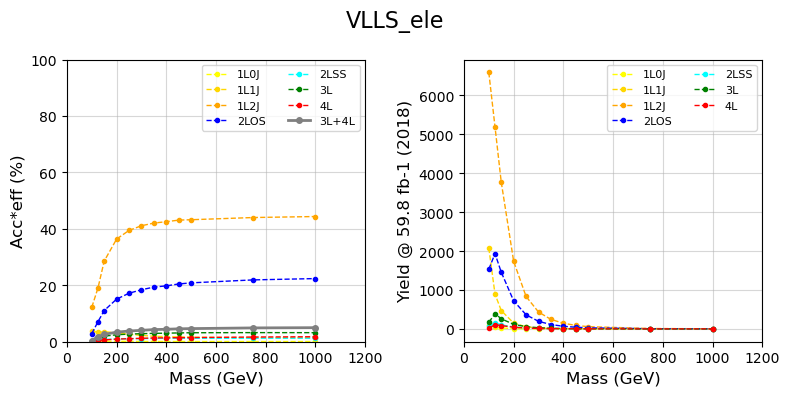

In [10]:
make_plot("VLLS_ele")

../input_files/hst_VLLS_mu_M350.root not found ... removing mass 350 from the dictionary
../input_files/hst_VLLS_mu_M600.root not found ... removing mass 600 from the dictionary
../input_files/hst_VLLS_mu_M800.root not found ... removing mass 800 from the dictionary


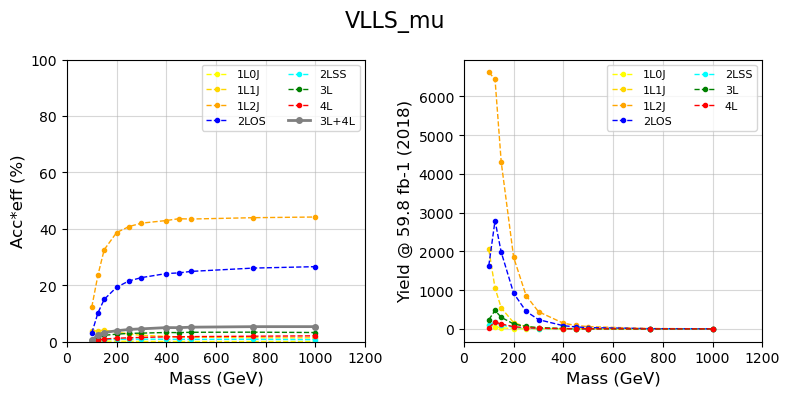

In [11]:
make_plot("VLLS_mu")

../input_files/hst_VLLD_ele_M125.root not found ... removing mass 125 from the dictionary
../input_files/hst_VLLD_ele_M150.root not found ... removing mass 150 from the dictionary
../input_files/hst_VLLD_ele_M250.root not found ... removing mass 250 from the dictionary
../input_files/hst_VLLD_ele_M350.root not found ... removing mass 350 from the dictionary
../input_files/hst_VLLD_ele_M450.root not found ... removing mass 450 from the dictionary
../input_files/hst_VLLD_ele_M500.root not found ... removing mass 500 from the dictionary
../input_files/hst_VLLD_ele_M750.root not found ... removing mass 750 from the dictionary


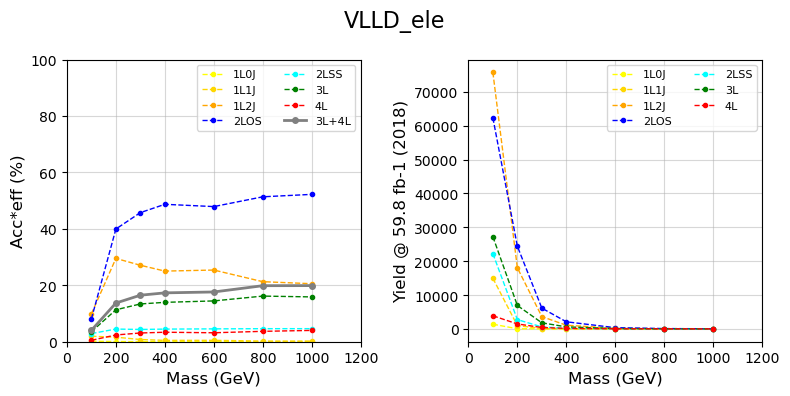

In [12]:
make_plot("VLLD_ele")

../input_files/hst_VLLD_mu_M125.root not found ... removing mass 125 from the dictionary
../input_files/hst_VLLD_mu_M150.root not found ... removing mass 150 from the dictionary
../input_files/hst_VLLD_mu_M250.root not found ... removing mass 250 from the dictionary
../input_files/hst_VLLD_mu_M350.root not found ... removing mass 350 from the dictionary
../input_files/hst_VLLD_mu_M450.root not found ... removing mass 450 from the dictionary
../input_files/hst_VLLD_mu_M500.root not found ... removing mass 500 from the dictionary
../input_files/hst_VLLD_mu_M750.root not found ... removing mass 750 from the dictionary
../input_files/hst_VLLD_mu_M1000.root not found ... removing mass 1000 from the dictionary


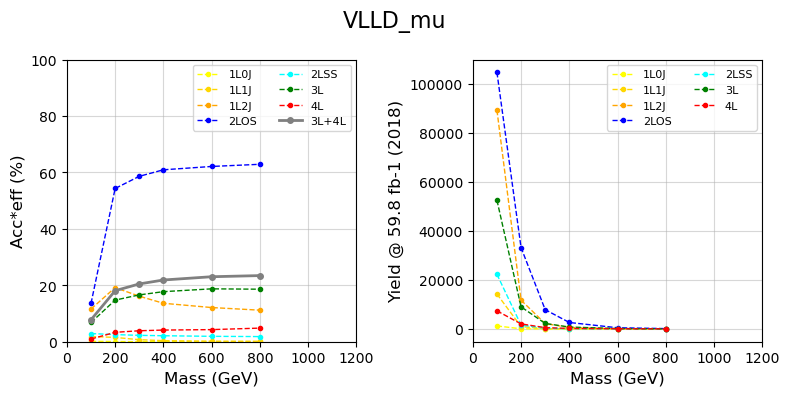

In [13]:
make_plot("VLLD_mu")